# **Prueba tecnica: Análisis bioestadístico**

Para empezar se crea un entorno virtual que se llama biostatistics que contiene todas las librerias
necesarias para el proyecto. Se procedera a analizar los datos de cada uno de los dataset individuales.

El primer objetivo trazado es llegar a una estructura de datos que contenga cada país con sus indicadores y un diccionario de dicha estructura.

In [1]:
import pandas as pd

Ahora se leeran y analizaran los datos de csv individuales para crear una estructura de datos

In [2]:


ruta = "C:/Users/USUARIO/Documents/GitHub/Biostatistics-analysis/datos"

df_age_death = pd.read_csv(f"{ruta}/30-70cancerChdEtc.csv")
df_airpollution_death_rate = pd.read_csv(f"{ruta}/airPollutionDeathRate.csv")
df_alcohol_substance_abuse = pd.read_csv(f"{ruta}/alcoholSubstanceAbuse.csv")
df_crude_suicide_rates = pd.read_csv(f"{ruta}/crudeSuicideRates.csv")
df_incidence_tuberculosis = pd.read_csv(f"{ruta}/incedenceOfTuberculosis.csv")
df_infant_mortality_rate = pd.read_csv(f"{ruta}/infantMortalityRate.csv")
df_maternal_mortality_ratio = pd.read_csv(f"{ruta}/maternalMortalityRatio.csv")
df_road_traffic_deaths = pd.read_csv(f"{ruta}/roadTrafficDeaths.csv")
df_tobacco_age = pd.read_csv(f"{ruta}/tobaccoAge15.csv")


Visualizando los datos correspondientes al primer df

In [3]:
df_age_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2745 non-null   object 
 1   Period         2745 non-null   int64  
 2   Indicator      2745 non-null   object 
 3   Dim1           2745 non-null   object 
 4   First Tooltip  2745 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 107.4+ KB


In [4]:
df_age_death.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9


Se visualiza que los datos se encuentran en formato adecuado

In [5]:
df_age_death.Indicator.unique()

array(['Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease'],
      dtype=object)

Se crea la columna para concatenar los dataframes

In [6]:
df_age_death['Probability of dying 30-70'] = df_age_death['First Tooltip'].copy()

In [7]:
df_age_death.Location.nunique()

184

Verificando que los datos tengan congruencia

In [8]:
df_age_death[df_age_death['First Tooltip']>100].sum()

Location                        0
Period                          0
Indicator                       0
Dim1                            0
First Tooltip                 0.0
Probability of dying 30-70    0.0
dtype: object

Se debe dejar el dataframe solo con las columnas de interés.

### **Se crea una función para filtrar las columnas**

In [9]:
def filter_dataframes(df,columns):
    df_copy = df.copy()
    df_filtered = df_copy[[columns]]
    return df_filtered

#### **Se crea una función para borrar columnas**

In [10]:
def drop_columns(df, columns_d):
    df_copy = df.copy()
    df_copy.drop(columns=columns_d, inplace=True)
    return df_copy


In [11]:
columns_drop = ['Indicator', 'First Tooltip']
df_age_copy = drop_columns(df_age_death, columns_drop)

Ahora se procedera de la misma forma con el resto de dataframes

#### **Para el segundo dataframe**

In [12]:
df_airpollution_death_rate.head()

,Location,Dim2,Indicator,Period,Dim1,First Tooltip
0,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,95.12 [85.12-104.3]
1,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,95.58 [85.5-106]
2,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Female,94.63 [84.55-103.9]
3,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,211.1 [188.9-231.3]
4,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,228.7 [204.6-253.6]


Se crea una función de preprocesamiento para separar la mediana del intervalo de confianza y el intervalo en dos columnas.

In [13]:

def split_interval_median(df, column, name_column, median):
    pattern = r'\[(.*?)\]' 
    df[name_column] = df[column].str.extract(pattern, expand=False)
    df[median] = df[column].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)
    return df

In [14]:
df_airpollution_death_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       6588 non-null   object
 1   Dim2           6588 non-null   object
 2   Indicator      6588 non-null   object
 3   Period         6588 non-null   int64 
 4   Dim1           6588 non-null   object
 5   First Tooltip  6588 non-null   object
dtypes: int64(1), object(5)
memory usage: 308.9+ KB


Se observan los indicadores presentes en el dataframe

In [15]:
df_airpollution_death_rate.Indicator.unique()

array(['Ambient and household air pollution attributable death rate (per 100 000 population)',
       'Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)'],
      dtype=object)

In [16]:
df_airpollution_death_rate.Dim2.unique()

array(['Total', 'Lower respiratory infections',
       'Trachea, bronchus, lung cancers', 'Ischaemic heart disease',
       'Stroke', 'Chronic obstructive pulmonary disease'], dtype=object)

In [17]:
df_airpollution_death_rate.Location.nunique()

183

In [18]:
df_indicator_air = df_airpollution_death_rate[df_airpollution_death_rate['Indicator'] ==
 'Ambient and household air pollution attributable death rate (per 100 000 population)']

In [19]:
df_indicator_air_normalized = df_airpollution_death_rate[df_airpollution_death_rate['Indicator'] ==
 'Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)']

In [20]:
split_interval_median(df_indicator_air, "First Tooltip", "Pollution death rate per 100 000", "Median pollution death rate per 100 000")

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_36164\3424376160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_column] = df[column].str.extract(pattern, expand=False)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_36164\3424376160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[median] = df[column].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)


,Location,Dim2,Indicator,Period,Dim1,First Tooltip,Pollution death rate per 100 000,Median pollution death rate per 100 000
0,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,95.12 [85.12-104.3],85.12-104.3,95.12
1,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,95.58 [85.5-106],85.5-106,95.58
2,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Female,94.63 [84.55-103.9],84.55-103.9,94.63
6,Afghanistan,Lower respiratory infections,Ambient and household air pollution attributab...,2016,Both sexes,31.26 [25.66-35.67],25.66-35.67,31.26
7,Afghanistan,Lower respiratory infections,Ambient and household air pollution attributab...,2016,Male,29.37 [24.07-33.6],24.07-33.6,29.37
...,...,...,...,...,...,...,...,...
6577,Zimbabwe,Stroke,Ambient and household air pollution attributab...,2016,Male,6.17 [5.26-7.21],5.26-7.21,6.17
6578,Zimbabwe,Stroke,Ambient and household air pollution attributab...,2016,Female,10.27 [8.7-12],8.7-12,10.27
6582,Zimbabwe,Chronic obstructive pulmonary disease,Ambient and household air pollution attributab...,2016,Both sexes,5.88 [4.26-7.26],4.26-7.26,5.88
6583,Zimbabwe,Chronic obstructive pulmonary disease,Ambient and household air pollution attributab...,2016,Male,5.54 [2.74-7.66],2.74-7.66,5.54


In [21]:
df_air_copy = drop_columns(df_indicator_air, columns_drop)

In [22]:
split_interval_median(df_indicator_air_normalized, "First Tooltip", "Pollution death rate per 100 000 standarized", "Median pollution death rate per 100 000 standarized")

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_36164\3424376160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_column] = df[column].str.extract(pattern, expand=False)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_36164\3424376160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[median] = df[column].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)


,Location,Dim2,Indicator,Period,Dim1,First Tooltip,Pollution death rate per 100 000 standarized,Median pollution death rate per 100 000 standarized
3,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,211.1 [188.9-231.3],188.9-231.3,211.10
4,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,228.7 [204.6-253.6],204.6-253.6,228.70
5,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Female,194.7 [173.9-213.7],173.9-213.7,194.70
9,Afghanistan,Lower respiratory infections,Ambient and household air pollution attributab...,2016,Both sexes,31.68 [26.01-36.15],26.01-36.15,31.68
10,Afghanistan,Lower respiratory infections,Ambient and household air pollution attributab...,2016,Male,33.19 [27.21-37.97],27.21-37.97,33.19
...,...,...,...,...,...,...,...,...
6580,Zimbabwe,Stroke,Ambient and household air pollution attributab...,2016,Male,16.48 [14.04-19.26],14.04-19.26,16.48
6581,Zimbabwe,Stroke,Ambient and household air pollution attributab...,2016,Female,22.68 [19.22-26.5],19.22-26.5,22.68
6585,Zimbabwe,Chronic obstructive pulmonary disease,Ambient and household air pollution attributab...,2016,Both sexes,16.09 [11.67-19.89],11.67-19.89,16.09
6586,Zimbabwe,Chronic obstructive pulmonary disease,Ambient and household air pollution attributab...,2016,Male,17.72 [8.75-24.51],8.75-24.51,17.72


In [23]:
df_air_copy_normalized = drop_columns(df_indicator_air_normalized, columns_drop)

#### **Para el tercer dataframe**

Ahora a explorar el tercer dataframe

In [24]:
df_alcohol_substance_abuse.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
1,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Male,0.360
2,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Female,0.055
3,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
4,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Male,0.350


In [25]:
df_alcohol_substance_abuse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2787 non-null   object 
 1   Period         2787 non-null   int64  
 2   Indicator      2787 non-null   object 
 3   Dim1           2787 non-null   object 
 4   First Tooltip  2787 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 109.0+ KB


In [26]:
df_alcohol_substance_abuse.Indicator.unique()

array(['Total (recorded+unrecorded) alcohol per capita (15+) consumption'],
      dtype=object)

In [27]:
df_alcohol_substance_abuse['Alcohol per capita (15+) consumption'] =df_alcohol_substance_abuse['First Tooltip']

In [28]:
df_alcohol_substance_abuse.Location.nunique()

188

In [29]:

df_alcohol_copy = drop_columns(df_alcohol_substance_abuse, columns_drop)

Vemos que existe una diferencia entre los paises que se encuentran en cada dataframe por lo que debe ser tenida en cuenta 
a la hora de unir los dataframes

#### **Explorando el dataframe 4 se tiene**

In [30]:
df_crude_suicide_rates.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8


In [31]:
df_crude_suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2745 non-null   object 
 1   Period         2745 non-null   int64  
 2   Indicator      2745 non-null   object 
 3   Dim1           2745 non-null   object 
 4   First Tooltip  2745 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 107.4+ KB


In [32]:
df_crude_suicide_rates.Indicator.unique()


array(['Crude suicide rates (per 100 000 population)'], dtype=object)

Acá se crea la columna para concatenar los dataframes

In [33]:
df_crude_suicide_rates['Crude suicide rates per 100 000'] = df_crude_suicide_rates['First Tooltip'].copy()

In [34]:
df_crude_suicide_rates.Location.nunique()

184

In [35]:

df_suicide_copy = drop_columns(df_crude_suicide_rates, columns_drop)

#### **Ahora el dataframe 5**

In [36]:
df_incidence_tuberculosis.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189 [122-270]
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189 [122-270]
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189 [122-270]
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189 [122-270]
4,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2015,189 [122-270]


In [37]:
split_interval_median(df_incidence_tuberculosis, "First Tooltip", "Incidence of tuberculosis per 100 000", "Median incidence of tuberculosis")

,Location,Indicator,Period,First Tooltip,Incidence of tuberculosis per 100 000,Median incidence of tuberculosis
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189 [122-270],122-270,189.0
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189 [122-270],122-270,189.0
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189 [122-270],122-270,189.0
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189 [122-270],122-270,189.0
4,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2015,189 [122-270],122-270,189.0
...,...,...,...,...,...,...
3852,Zimbabwe,Incidence of tuberculosis (per 100 000 populat...,2004,607 [451-786],451-786,607.0
3853,Zimbabwe,Incidence of tuberculosis (per 100 000 populat...,2003,617 [462-794],462-794,617.0
3854,Zimbabwe,Incidence of tuberculosis (per 100 000 populat...,2002,617 [478-773],478-773,617.0
3855,Zimbabwe,Incidence of tuberculosis (per 100 000 populat...,2001,617 [461-795],461-795,617.0


In [38]:
df_incidence_tuberculosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Location                               3857 non-null   object 
 1   Indicator                              3857 non-null   object 
 2   Period                                 3857 non-null   int64  
 3   First Tooltip                          3857 non-null   object 
 4   Incidence of tuberculosis per 100 000  3857 non-null   object 
 5   Median incidence of tuberculosis       3857 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.9+ KB


In [39]:
df_incidence_tuberculosis.Indicator.unique()

array(['Incidence of tuberculosis (per 100 000 population per year)'],
      dtype=object)

Ahora se crea la columna para concatenar los dataframes

In [40]:
df_incidence_tuberculosis.Location.nunique()

195

In [41]:

df_tuberculosis_copy = drop_columns(df_incidence_tuberculosis, columns_drop)

#### **Ahora el dataframe 6**

In [42]:
df_infant_mortality_rate.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51 [37.71-55.82]
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.8 [40.2-59.95]
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05 [34.82-51.96]
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04 [39.94-56.32]
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35 [42.56-60.4]


In [43]:
df_infant_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       29999 non-null  object
 1   Period         29999 non-null  int64 
 2   Indicator      29999 non-null  object
 3   Dim1           29999 non-null  object
 4   First Tooltip  29999 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [44]:
df_infant_mortality_rate.duplicated().sum()

0

In [45]:
df_infant_mortality_rate.Indicator.unique()

array(['Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)'],
      dtype=object)

In [46]:
split_interval_median(df_infant_mortality_rate, "First Tooltip", "Infant mortality rate", "Median infant mortality rate")

,Location,Period,Indicator,Dim1,First Tooltip,Infant mortality rate,Median infant mortality rate
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51 [37.71-55.82],37.71-55.82,46.51
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.8 [40.2-59.95],40.2-59.95,49.80
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05 [34.82-51.96],34.82-51.96,43.05
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04 [39.94-56.32],39.94-56.32,48.04
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35 [42.56-60.4],42.56-60.4,51.35
...,...,...,...,...,...,...,...
29994,Timor-Leste,2002,Infant mortality rate (probability of dying be...,Both sexes,77.08 [70.29-84.49],70.29-84.49,77.08
29995,Timor-Leste,2002,Infant mortality rate (probability of dying be...,Male,82.53 [74.86-90.67],74.86-90.67,82.53
29996,Timor-Leste,2002,Infant mortality rate (probability of dying be...,Female,71.37 [64.81-78.76],64.81-78.76,71.37
29997,Timor-Leste,2001,Infant mortality rate (probability of dying be...,Both sexes,80.96 [74.1-88.4],74.1-88.4,80.96


In [47]:
df_infant_mortality_rate.Location.nunique()

177

In [48]:

df_infant_copy = drop_columns(df_infant_mortality_rate, columns_drop)

#### **Ahora el septimo dataframe**

In [49]:
df_maternal_mortality_ratio.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Maternal mortality ratio (per 100 000 live bir...,638 [427-1010]
1,Afghanistan,2016,Maternal mortality ratio (per 100 000 live bir...,673 [457-1040]
2,Afghanistan,2015,Maternal mortality ratio (per 100 000 live bir...,701 [501-1020]
3,Afghanistan,2014,Maternal mortality ratio (per 100 000 live bir...,786 [592-1080]
4,Afghanistan,2013,Maternal mortality ratio (per 100 000 live bir...,810 [617-1080]


In [50]:
df_maternal_mortality_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       3294 non-null   object
 1   Period         3294 non-null   int64 
 2   Indicator      3294 non-null   object
 3   First Tooltip  3294 non-null   object
dtypes: int64(1), object(3)
memory usage: 103.1+ KB


In [51]:
df_maternal_mortality_ratio.duplicated().sum()

0

In [52]:
df_maternal_mortality_ratio.Indicator.unique()

array(['Maternal mortality ratio (per 100 000 live births)'], dtype=object)

In [53]:
df_maternal_mortality_ratio.Location.nunique()

184

In [54]:
split_interval_median(df_maternal_mortality_ratio, "First Tooltip", "Maternal mortality ratio per 100 000", "Median maternal mortality ratio per 100 000")

,Location,Period,Indicator,First Tooltip,Maternal mortality ratio per 100 000,Median maternal mortality ratio per 100 000
0,Afghanistan,2017,Maternal mortality ratio (per 100 000 live bir...,638 [427-1010],427-1010,638.0
1,Afghanistan,2016,Maternal mortality ratio (per 100 000 live bir...,673 [457-1040],457-1040,673.0
2,Afghanistan,2015,Maternal mortality ratio (per 100 000 live bir...,701 [501-1020],501-1020,701.0
3,Afghanistan,2014,Maternal mortality ratio (per 100 000 live bir...,786 [592-1080],592-1080,786.0
4,Afghanistan,2013,Maternal mortality ratio (per 100 000 live bir...,810 [617-1080],617-1080,810.0
...,...,...,...,...,...,...
3289,Zimbabwe,2004,Maternal mortality ratio (per 100 000 live bir...,686 [597-784],597-784,686.0
3290,Zimbabwe,2003,Maternal mortality ratio (per 100 000 live bir...,680 [590-779],590-779,680.0
3291,Zimbabwe,2002,Maternal mortality ratio (per 100 000 live bir...,666 [577-766],577-766,666.0
3292,Zimbabwe,2001,Maternal mortality ratio (per 100 000 live bir...,629 [544-723],544-723,629.0


In [55]:
df_maternal_copy = drop_columns(df_maternal_mortality_ratio, columns_drop)

#### **Para el octavo dataframe**

In [56]:
df_road_traffic_deaths.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Estimated road traffic death rate (per 100 000...,2016,15.1
1,Albania,Estimated road traffic death rate (per 100 000...,2016,13.6
2,Angola,Estimated road traffic death rate (per 100 000...,2016,23.6
3,Antigua and Barbuda,Estimated road traffic death rate (per 100 000...,2016,7.9
4,Argentina,Estimated road traffic death rate (per 100 000...,2016,14.0


In [57]:
df_road_traffic_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       175 non-null    object 
 1   Indicator      175 non-null    object 
 2   Period         175 non-null    int64  
 3   First Tooltip  175 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.6+ KB


In [58]:
df_road_traffic_deaths.Indicator.unique()

array(['Estimated road traffic death rate (per 100 000 population)'],
      dtype=object)

In [59]:
df_road_traffic_deaths['Road traffic death rate (per 100 000'] = df_road_traffic_deaths['First Tooltip'].copy()

In [60]:
df_traffic_copy = drop_columns(df_road_traffic_deaths, columns_drop)

#### **Ahora el ultimo dataframe**

In [61]:
df_tobacco_age.head()

,Location,Indicator,Period,Dim1,First Tooltip
0,Albania,Age-standardized prevalence of current tobacco...,2018,Both sexes,29.2
1,Albania,Age-standardized prevalence of current tobacco...,2018,Male,50.5
2,Albania,Age-standardized prevalence of current tobacco...,2018,Female,7.9
3,Albania,Age-standardized prevalence of current tobacco...,2017,Both sexes,29.3
4,Albania,Age-standardized prevalence of current tobacco...,2017,Male,50.6


In [62]:
df_tobacco_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       4023 non-null   object 
 1   Indicator      4023 non-null   object 
 2   Period         4023 non-null   int64  
 3   Dim1           4023 non-null   object 
 4   First Tooltip  4023 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [63]:
df_tobacco_age.duplicated().sum()

0

In [64]:
df_tobacco_age.Indicator.unique()

array(['Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older'],
      dtype=object)

In [65]:
df_tobacco_age.Location.nunique()

149

In [66]:
df_tobacco_age['Prevalence of current tobacco smoking (15+)'] = df_tobacco_age['First Tooltip'].copy()

In [67]:

df_tobacco_copy = drop_columns(df_tobacco_age, columns_drop)

Se añade la columna para hacer el cruce.

La estrategia sera unir los dataframes a traves de la columna pais, año y los indicadores seran las columnas del nuevo 
dataframe, primero se realizara este procedimiento con los dataframes que no tengan indicadores categorizados por sexo.

Estos son: df_maternal_copy, df_tuberculosis_copy, df_traffic_copy

##### **Se crea una función para hacer el cruce**

In [68]:
def concatenate_dfs_in_sequence(df_list, merge_columns, merge_how="outer"):

    concatenated_result = pd.merge(df_list[0], df_list[1], on=merge_columns, how=merge_how)

    for df in df_list[2:]:
        concatenated_result = pd.merge(concatenated_result, df, on=merge_columns, how=merge_how)

    return concatenated_result


In [69]:
list_dataframes_nodim = [df_maternal_copy, df_tuberculosis_copy, df_traffic_copy]
merge_columns_first = ["Location", "Period"]
df_final = concatenate_dfs_in_sequence(list_dataframes_nodim, merge_columns_first, merge_how="outer")


Solo se dejaran los indicadores, en caso de que solo se encuentre un indicador el otro será null

Ahora para trabajar con el resto de dataframes que si tienen la variable sexo se añadirá una columna que contenga el sexo y que será 
la clave para combinar el resto de dataframes.

In [70]:
df_final.loc[:, 'Dim1'] = 'Both sexes'

Se concatenarán todos aquellos dataframes que tengan la columna localización, dim1, pais excluyendo el que tiene dim2 que se le dará otro manejo.


La lista es la siguiente, los que se marcan con (-) serán los incluidos:



df_airpollution_death_rate --

df_age_copy --

df_alcohol_copy **

df_suicide_copy --

df_tuberculosis_copy **

df_infant_copy --

df_maternal_copy **

df_tobacco_copy --

df_traffic_copy --

df_air_copy_normalized --

df_air_copy --


In [71]:
list_dataframes_air = [df_air_copy_normalized
,df_air_copy]
merge_columns_air = ["Location", "Period", "Dim1", "Dim2"]
merge_how = "outer"
df_str_air = concatenate_dfs_in_sequence(list_dataframes_air, merge_columns_air, merge_how)


In [72]:
list_dataframes = [df_age_copy, df_suicide_copy, df_infant_copy,
 df_tobacco_copy, df_final, df_alcohol_copy, df_str_air]

In [73]:
merge_columns = ["Location", "Period", "Dim1"]
merge_how = "outer"
df_structured = concatenate_dfs_in_sequence(list_dataframes, merge_columns, merge_how)


 Cambiar el nombre de algunas columnas que no brindan información

In [74]:
nuevos_nombres = {
    'Dim1': 'Gender',
    'Dim2': 'Cause'
}
df_structured.rename(columns=nuevos_nombres, inplace=True)

# **Se construyó una estructura con todos los datos disponibles**

In [77]:
df_structured

,Location,Period,Gender,Probability of dying 30-70,Crude suicide rates per 100 000,Infant mortality rate,Median infant mortality rate,Prevalence of current tobacco smoking (15+),Maternal mortality ratio per 100 000,Median maternal mortality ratio per 100 000,Incidence of tuberculosis per 100 000,Median incidence of tuberculosis,Road traffic death rate (per 100 000,Alcohol per capita (15+) consumption,Cause,Pollution death rate per 100 000 standarized,Median pollution death rate per 100 000 standarized,Pollution death rate per 100 000,Median pollution death rate per 100 000
0,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Total,188.9-231.3,211.10,85.12-104.3,95.12
1,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Lower respiratory infections,26.01-36.15,31.68,25.66-35.67,31.26
2,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,"Trachea, bronchus, lung cancers",3.03-4.92,4.05,1.21-1.96,1.61
3,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Ischaemic heart disease,91.91-121.1,106.90,33.12-43.65,38.51
4,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Stroke,38.59-51.65,45.10,13.48-18.04,15.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33555,Turkmenistan,2018,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN
33556,Venezuela (Bolivarian Republic of),2018,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.60,NaN,NaN,NaN,NaN,NaN
33557,Venezuela (Bolivarian Republic of),2018,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,NaN,NaN,NaN,NaN,NaN
33558,Viet Nam,2018,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN,NaN,NaN,NaN,NaN


La estructura construida presenta los países con sus indicadores por año, las columnas de NaN representan los datos de indicadores
que no fueron reportados.

In [76]:
df_structured.to_excel('structured_data.xlsx')

### **Ahora se mostrará el diccionario de la estructura de datos creada**

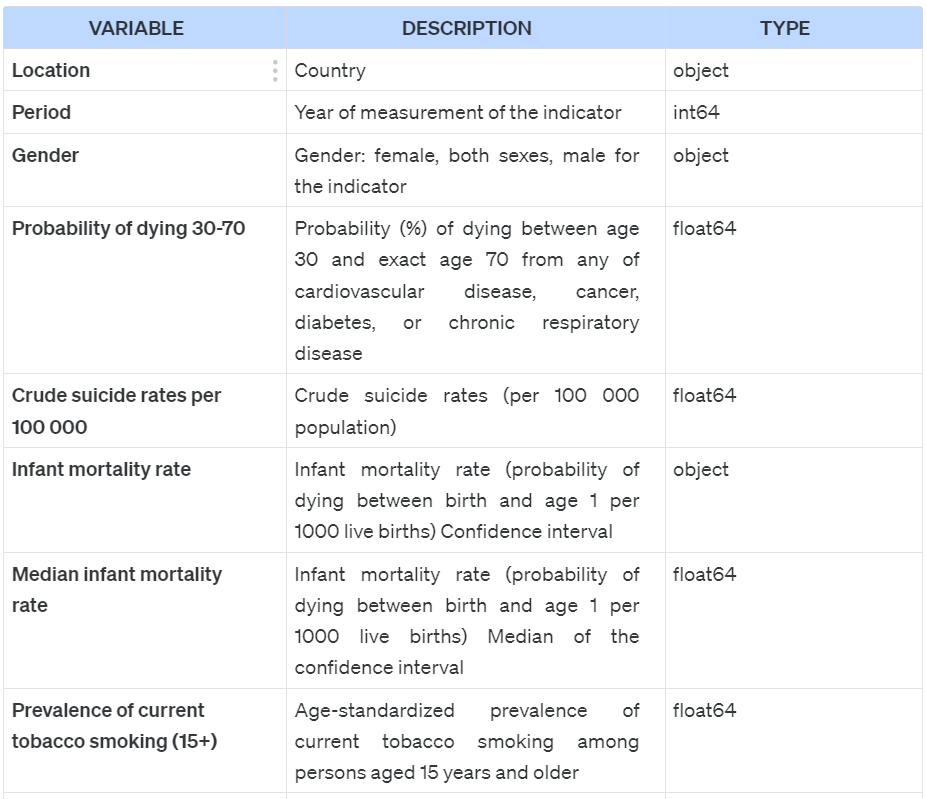


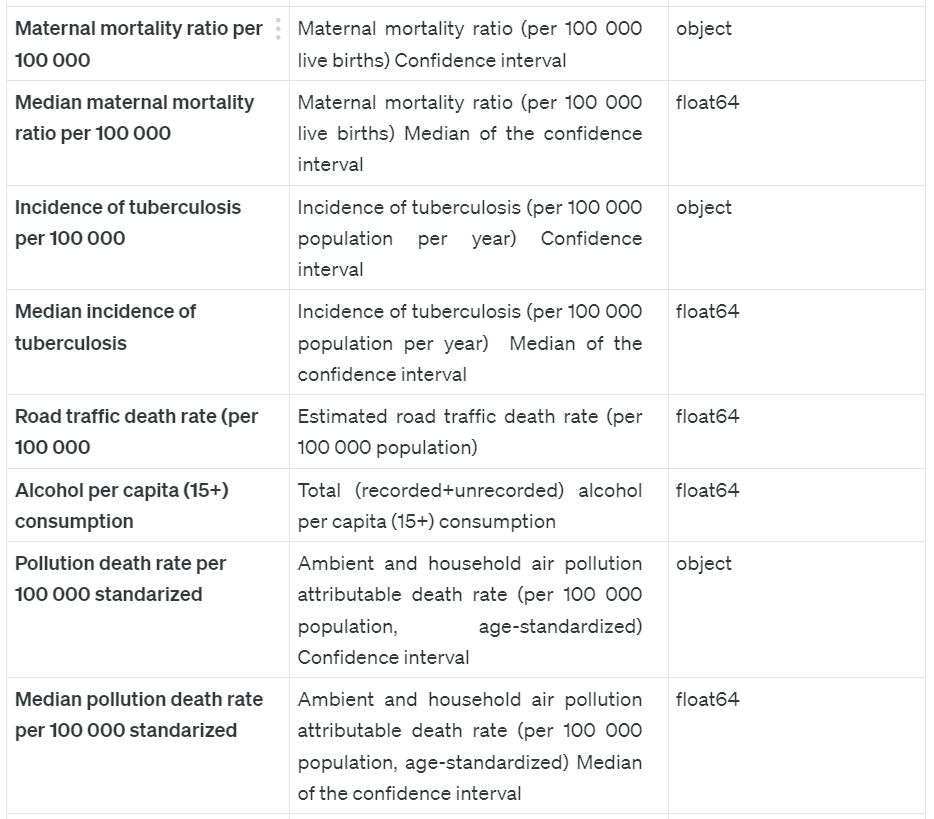

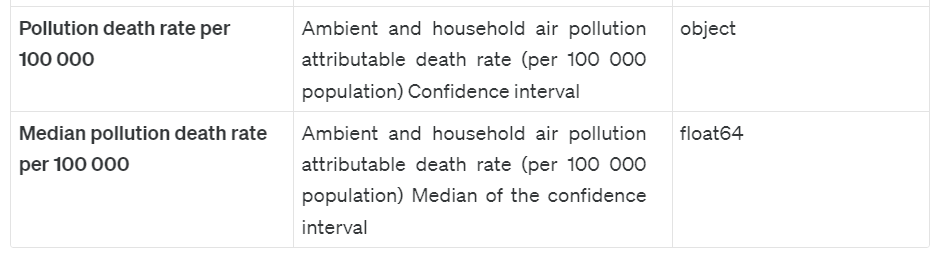

# **Segunda parte**

Como segundo objetivo se tiene realizar análisis descriptivo (univariado y multivariado)